<a href="https://colab.research.google.com/github/RajChanda/Machine-Learning-Projects/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(units = 128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0773 - accuracy: 0.9756 - val_loss: 0.0724 - val_accuracy: 0.9775
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0674 - accuracy: 0.9784 - val_loss: 0.0688 - val_accuracy: 0.9787
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0596 - accuracy: 0.9801 - val_loss: 0.0713 - val_accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0540 - accuracy: 0.9821 - val_loss: 0.0715 - val_accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0490 - accuracy: 0.9838 - val_loss: 0.0670 - val_accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0456 - accuracy: 0.9851 - val_loss: 0.0710 - val_accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0409 - accuracy: 0.9863 - val_loss: 0.0699 - val_accura

In [ ]:
import matplotlib.pyplot as plt

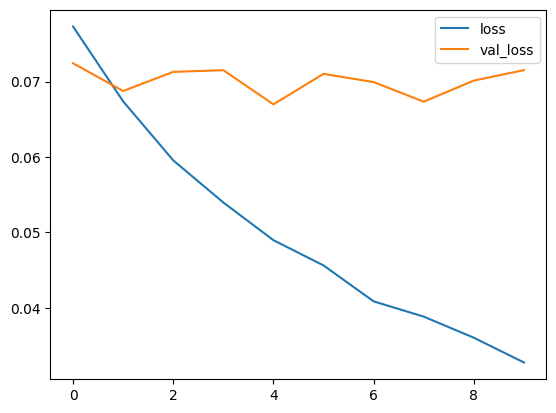

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

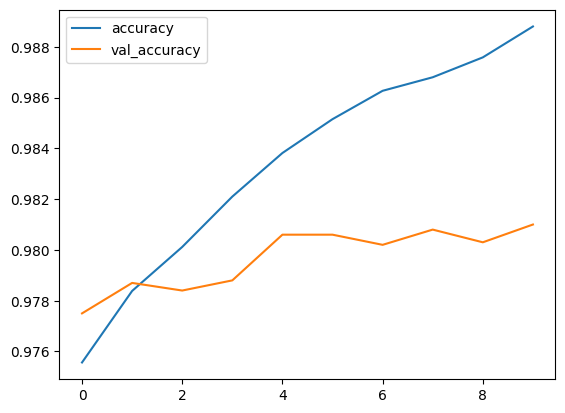

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [ ]:
import numpy as np

In [ ]:
p_test = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


(1,)


<ipython-input-39-14abdc5c8d9a>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_idx = np.where(p_test != y_test)[0]


Text(0.5, 1.0, 'actual : 7 and predicted : [6.6753936e-11 4.2663212e-12 3.4877338e-08 1.7840837e-06 2.2927051e-16\n 4.0397405e-09 5.4497353e-21 9.9999815e-01 6.5453684e-11 4.4500164e-09] ')

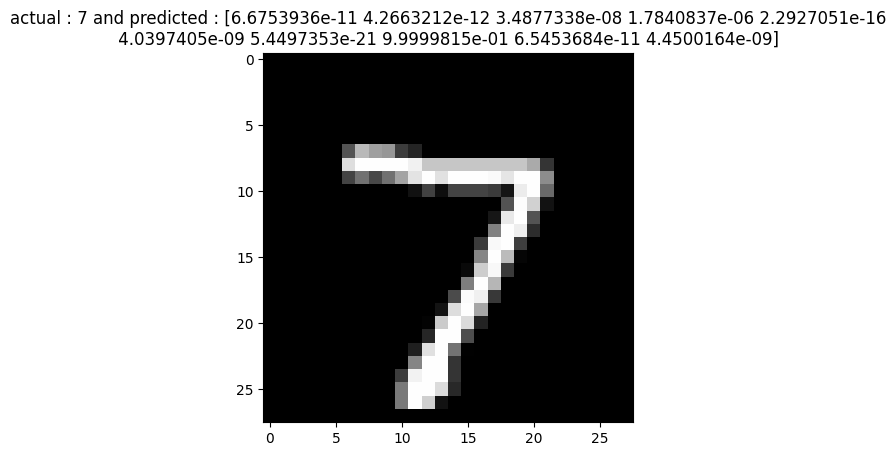

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
print(misclassified_idx.shape)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("actual : %s and predicted : %s " % (y_test[i], p_test[i]))